In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
image_format = 'jpeg'

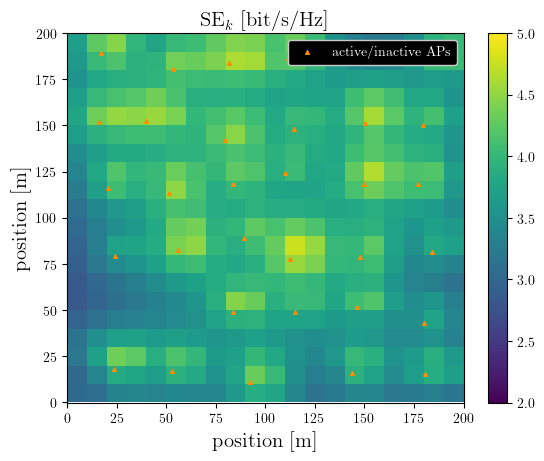

In [31]:
SE_pixelbased_variables = np.load(f'VARIABLES_SAVED/Grid_SE_pixelbased.npz')
SE_fixed_variables = np.load(f'VARIABLES_SAVED/Grid_SE_fixed.npz')

AP_positions = SE_pixelbased_variables['AP_positions']

Grid_SE_pixelbased = SE_pixelbased_variables['grid_product']
Grid_SE_fixed = SE_fixed_variables['grid_product']

# Determine the global min and max values for consistent scaling
vmin = min(Grid_SE_pixelbased.min(), Grid_SE_fixed.min())
vmax = max(Grid_SE_pixelbased.max(), Grid_SE_fixed.max())

# Suponiendo que correlation_grid, UE_position y AP_positions están definidos en otra parte del código
x = np.arange(0, 210, 10)
y = np.arange(0, 210, 10)

fig, ax0 = plt.subplots()
im0 = plt.pcolormesh(x, y, Grid_SE_pixelbased, cmap='viridis', vmin=2, vmax=5)
plt.title(r'SE$_k$ [bit/s/Hz]', size=15)
plt.xlabel(r'position [m]', size=15)
plt.xlim(-0.1,200)
plt.ylim(-0.1,200)
plt.ylabel(r'position [m]', size=15)
aps = plt.scatter(AP_positions.real, AP_positions.imag, marker='^', color='darkorange', s=7)
# plt.annotate('fixed UE', (UE_position.real-60, UE_position.imag-50), color='w', size=15)
fig.colorbar(im0, ax=ax0)
plt.legend([aps], ['active/inactive APs'], loc='upper right', framealpha=1, facecolor='k', labelcolor='w', fontsize=10)

# Volver a dibujar la figura para mostrar los cambios
plt.draw()
plt.show()

# Guardar la figura con el área de zoom
image_format = 'pdf'  # por ejemplo, .png, .svg, etc.
image_name = 'Grid_SE_pixelbased.pdf'
fig.savefig(image_name, format=image_format, dpi=400)

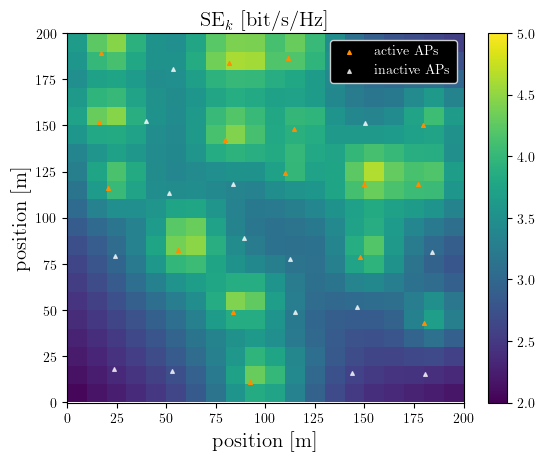

In [27]:
SE_pixelbased_variables = np.load(f'VARIABLES_SAVED/Grid_SE_pixelbased.npz')
SE_fixed_variables = np.load(f'VARIABLES_SAVED/Grid_SE_fixed.npz')

AP_positions = SE_fixed_variables['AP_positions']
Ap_state = SE_fixed_variables['best_APstate_fixed']

active_AP_positions = AP_positions[Ap_state == 1]
inactive_AP_positions = AP_positions[Ap_state == 0]


Grid_SE_pixelbased = SE_pixelbased_variables['grid_product']
Grid_SE_fixed = SE_fixed_variables['grid_product']

# Determine the global min and max values for consistent scaling
vmin = min(Grid_SE_pixelbased.min(), Grid_SE_fixed.min())
vmax = max(Grid_SE_pixelbased.max(), Grid_SE_fixed.max())

# Suponiendo que correlation_grid, UE_position y AP_positions están definidos en otra parte del código
x = np.arange(0, 210, 10)
y = np.arange(0, 210, 10)

fig, ax0 = plt.subplots()
im0 = plt.pcolormesh(x, y, Grid_SE_fixed, cmap='viridis', vmin=2, vmax=5)
plt.title(r'SE$_k$ [bit/s/Hz]', size=15)
plt.xlabel(r'position [m]', size=15)
plt.xlim(-0.1,200)
plt.ylim(-0.1,200)
plt.ylabel(r'position [m]', size=15)
active_aps = plt.scatter(active_AP_positions.real, active_AP_positions.imag, marker='^', color='darkorange', s=7)
inactive_aps = plt.scatter(inactive_AP_positions.real, inactive_AP_positions.imag, marker='^', color='white', s=7, alpha=0.7)
# plt.annotate('fixed UE', (UE_position.real-60, UE_position.imag-50), color='w', size=15)
fig.colorbar(im0, ax=ax0)
plt.legend((active_aps, inactive_aps), ('active APs', 'inactive APs'), loc='upper right', framealpha=1, facecolor='k', labelcolor='w', fontsize=10)

# Volver a dibujar la figura para mostrar los cambios
plt.draw()
plt.show()

# Guardar la figura con el área de zoom
image_format = 'pdf'  # por ejemplo, .png, .svg, etc.
image_name = 'Grid_SE_fixed.pdf'
fig.savefig(image_name, format=image_format, dpi=400)

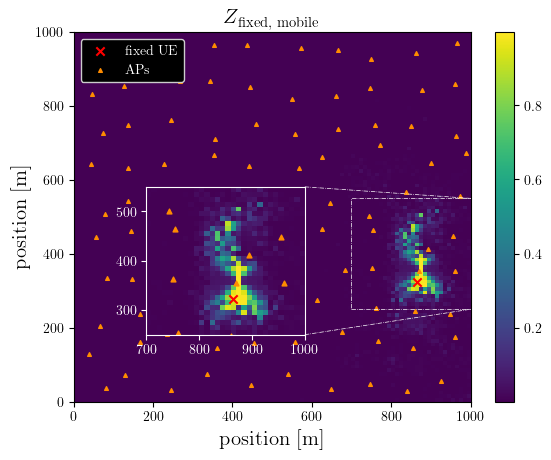

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

grid_variables = np.load(f'VARIABLES_SAVED/Grid_dotProduct.npz')
AP_positions = grid_variables['AP_positions']
correlation_grid = grid_variables['grid_product']
UE_position = grid_variables['UE_position']

# Suponiendo que correlation_grid, UE_position y AP_positions están definidos en otra parte del código
x = np.arange(0, 1010, 10)
y = np.arange(0, 1010, 10)

fig, ax0 = plt.subplots()
im0 = plt.pcolormesh(x, y, correlation_grid, cmap='viridis')
plt.title(r'$Z$\textsubscript{fixed, mobile}', size=15)
plt.xlabel(r'position [m]', size=15)
plt.xlim(-0.1,1000)
plt.ylim(-0.1,1000)
plt.ylabel(r'position [m]', size=15)
ue = plt.scatter(UE_position.real, UE_position.imag, marker='x', color='r')
aps = plt.scatter(AP_positions.real, AP_positions.imag, marker='^', color='darkorange', s=7)
# plt.annotate('fixed UE', (UE_position.real-60, UE_position.imag-50), color='w', size=15)
fig.colorbar(im0, ax=ax0)
plt.legend((ue, aps), ('fixed UE', 'APs'), loc='upper left', framealpha=1, facecolor='k', labelcolor='w', fontsize=10)

# Crear un zoom en el área de interés
axins = inset_axes(ax0, width="80%", height="80%", loc='upper right',
                   bbox_to_anchor=(0.1, 0.1, 0.5, 0.5),
                   bbox_transform=ax0.transAxes)
axins.pcolormesh(x, y, correlation_grid, cmap='viridis')
axins.scatter(UE_position.real, UE_position.imag, marker='x', color='r')
axins.scatter(AP_positions.real, AP_positions.imag, marker='^', color='darkorange', s=12)
# Especificar los límites del área de zoom
x1, x2, y1, y2 = 700, 1000, 250, 550
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.spines['bottom'].set_color('w')
axins.spines['top'].set_color('w')
axins.spines['left'].set_color('w')
axins.spines['right'].set_color('w')
axins.tick_params(axis='x', colors='w')  # Cambia el color de los números en el eje x a verde
axins.tick_params(axis='y', colors='w')

# Dibujar líneas que conectan el área de zoom con el gráfico principal
mark_inset(ax0, axins, loc1=1, loc2=4, fc="none", ec='w', ls = '-.', lw=0.5)

# Volver a dibujar la figura para mostrar los cambios
plt.draw()
plt.show()

# Guardar la figura con el área de zoom
image_format = 'pdf'  # por ejemplo, .png, .svg, etc.
image_name = 'Cfootprint_orthogonality_FixMob.pdf'
fig.savefig(image_name, format=image_format, dpi=400)

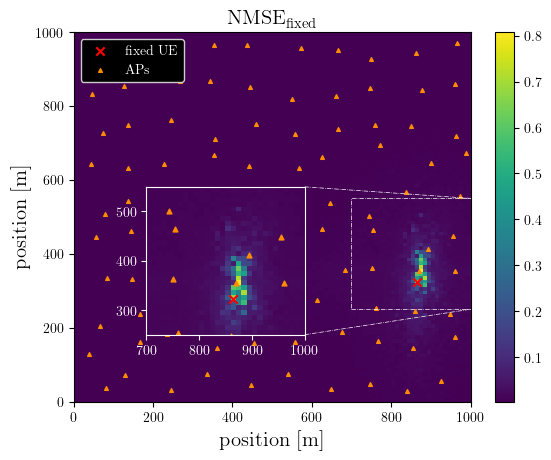

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

grid_variables = np.load(f'VARIABLES_SAVED/Grid_NMSE.npz')
AP_positions = grid_variables['AP_positions']
correlation_grid = grid_variables['grid_product']
UE_position = grid_variables['UE_position']

# Suponiendo que correlation_grid, UE_position y AP_positions están definidos en otra parte del código
x = np.arange(0, 1010, 10)
y = np.arange(0, 1010, 10)

fig, ax0 = plt.subplots()
im0 = plt.pcolormesh(x, y, correlation_grid, cmap='viridis')
plt.title(r'NMSE\textsubscript{fixed}', size=15)
plt.xlabel(r'position [m]', size=15)
plt.xlim(-0.1,1000)
plt.ylim(-0.1,1000)
plt.ylabel(r'position [m]', size=15)
ue = plt.scatter(UE_position.real, UE_position.imag, marker='x', color='r')
aps = plt.scatter(AP_positions.real, AP_positions.imag, marker='^', color='darkorange', s=7)
# plt.annotate('fixed UE', (UE_position.real-60, UE_position.imag-50), color='w', size=15)
fig.colorbar(im0, ax=ax0)
plt.legend((ue, aps), ('fixed UE', 'APs'), loc='upper left', framealpha=1, facecolor='k', labelcolor='w', fontsize=10)

# Crear un zoom en el área de interés
axins = inset_axes(ax0, width="80%", height="80%", loc='upper right',
                   bbox_to_anchor=(0.1, 0.1, 0.5, 0.5),
                   bbox_transform=ax0.transAxes)
axins.pcolormesh(x, y, correlation_grid, cmap='viridis')
axins.scatter(UE_position.real, UE_position.imag, marker='x', color='r')
axins.scatter(AP_positions.real, AP_positions.imag, marker='^', color='darkorange', s=12)
# Especificar los límites del área de zoom
x1, x2, y1, y2 = 700, 1000, 250, 550
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.spines['bottom'].set_color('w')
axins.spines['top'].set_color('w')
axins.spines['left'].set_color('w')
axins.spines['right'].set_color('w')
axins.tick_params(axis='x', colors='w')  # Cambia el color de los números en el eje x a verde
axins.tick_params(axis='y', colors='w')

# Dibujar líneas que conectan el área de zoom con el gráfico principal
mark_inset(ax0, axins, loc1=1, loc2=4, fc="none", ec='w', ls = '-.', lw=0.5)

# Volver a dibujar la figura para mostrar los cambios
plt.draw()
plt.show()

# Guardar la figura con el área de zoom
image_format = 'pdf'  # por ejemplo, .png, .svg, etc.
image_name = 'Cfootprint_NMSE_FixMob.pdf'
fig.savefig(image_name, format=image_format, dpi=400)